In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [3]:
df.shape

(500, 4)

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
new_df = df[['Height','Weight', 'Index']]
new_df.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [6]:
new_df.isnull().any()

Height    False
Weight    False
Index     False
dtype: bool

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


1.1 EDA(Explanatory Data Analysis)

In [8]:
import matplotlib.pyplot as plt

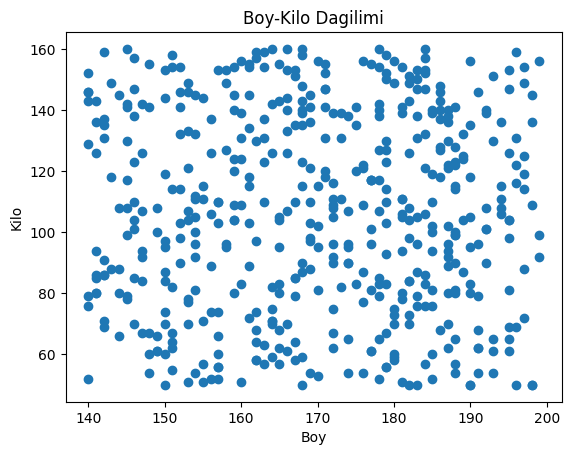

In [9]:
plt.scatter(new_df['Height'], new_df['Weight'])
plt.xlabel('Boy')
plt.ylabel('Kilo')
plt.title('Boy-Kilo Dagilimi')
plt.show()

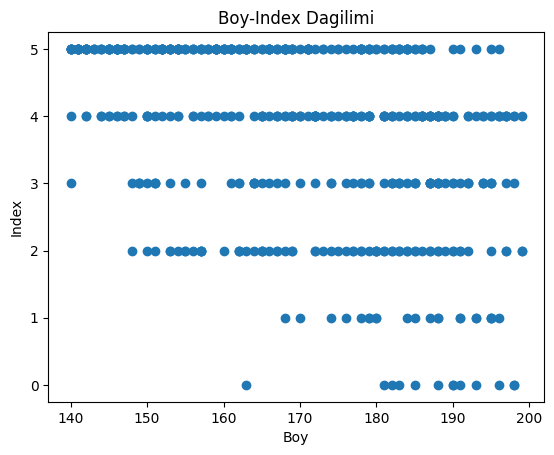

In [10]:
plt.scatter(new_df['Height'], new_df['Index'])
plt.xlabel('Boy')
plt.ylabel('Index')
plt.title('Boy-Index Dagilimi')
plt.show()

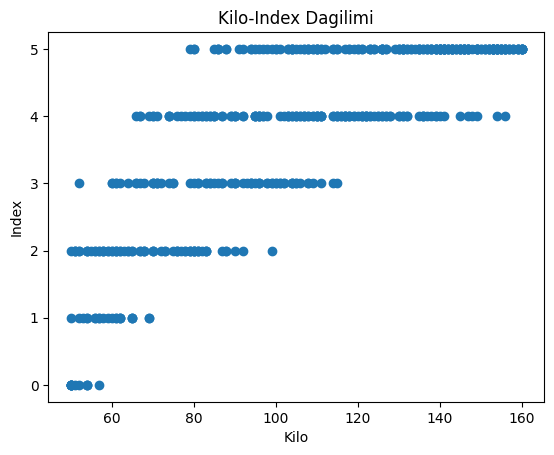

In [11]:
plt.scatter(new_df['Weight'], new_df['Index'])
plt.xlabel('Kilo')
plt.ylabel('Index')
plt.title('Kilo-Index Dagilimi')
plt.show()

In [12]:
import seaborn as sns

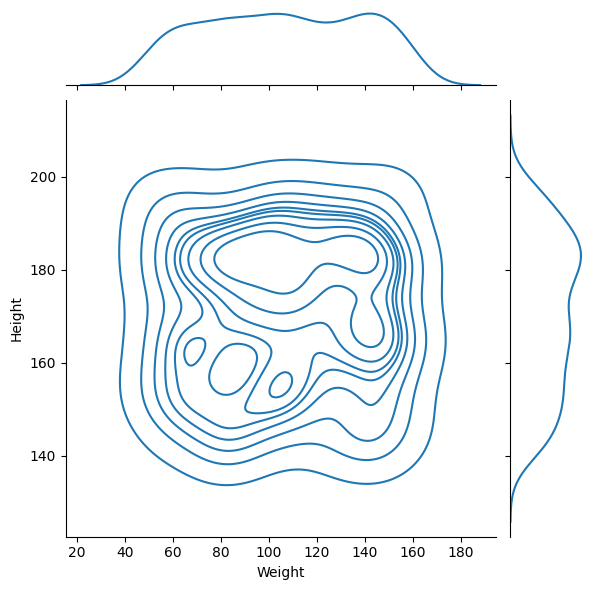

In [13]:
sns.jointplot(x='Weight', y='Height', data=new_df, kind='kde')

Text(0.5, 1.0, 'Indexe Gore Gruplandirilmis Boy Ve Kilo Verileri')

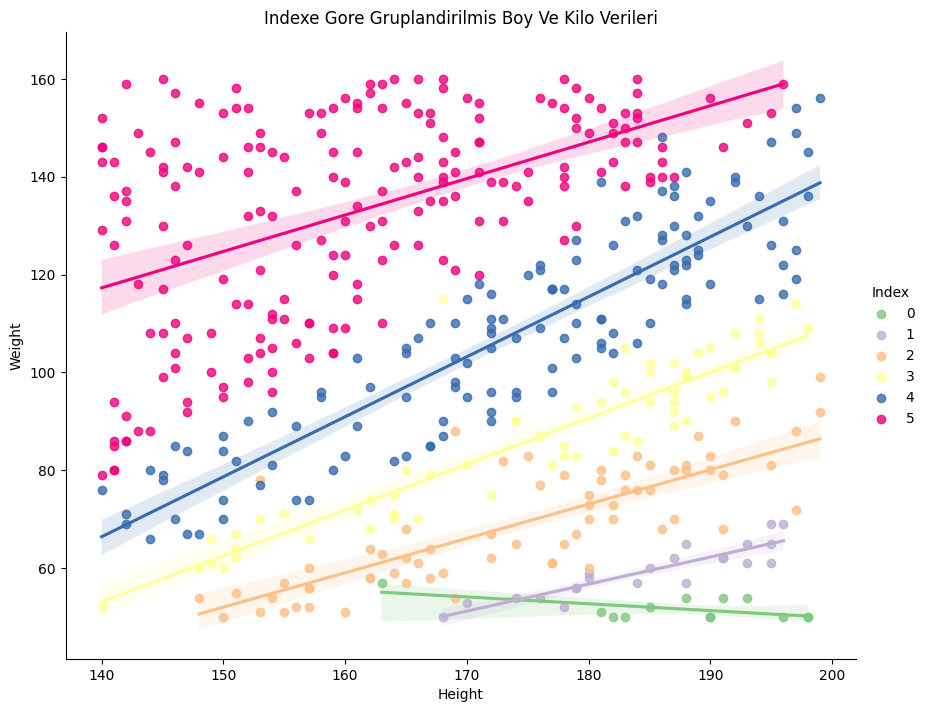

In [14]:
sns.lmplot(x='Height', y='Weight', hue='Index', data=new_df,
           fit_reg=True, height=7, aspect=1.25, palette='Accent')
ax = plt.gca()
ax.set_title("Indexe Gore Gruplandirilmis Boy Ve Kilo Verileri")

<AxesSubplot: >

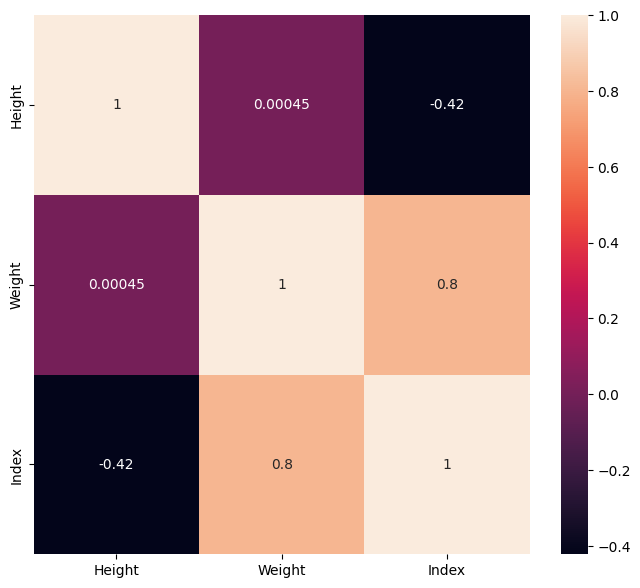

In [15]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(new_df.corr(), annot=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14784\4151738405.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col], ax=ax[2], label='Skewness %.2f%%'%(new_df[col].skew()))


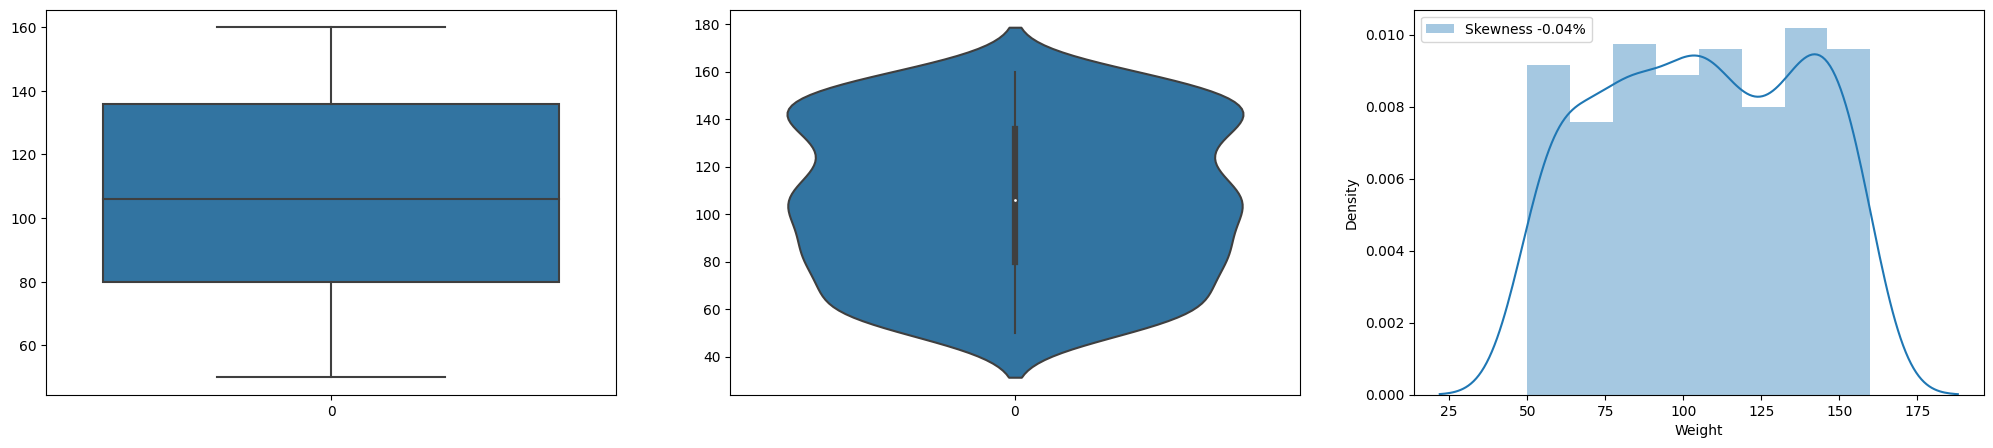

C:\Users\HP\AppData\Local\Temp\ipykernel_14784\4151738405.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col], ax=ax[2], label='Skewness %.2f%%'%(new_df[col].skew()))


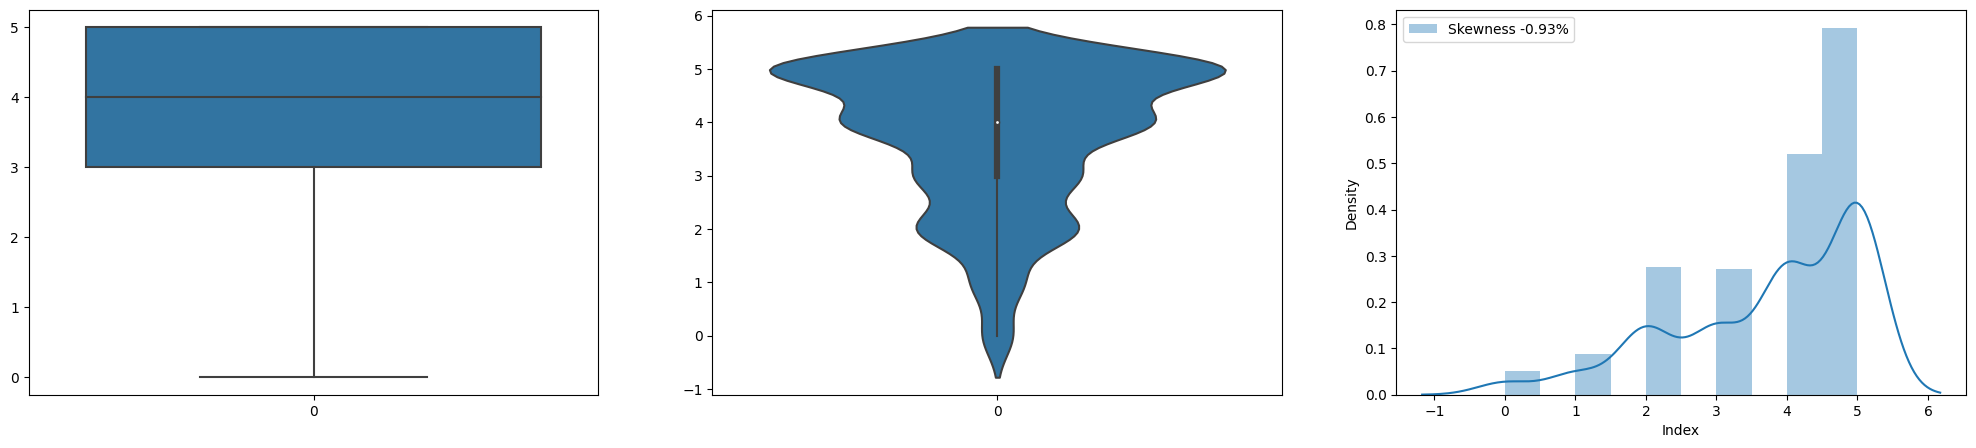

In [16]:
for col in new_df.iloc[:,1:3]:
    fig, ax= plt.subplots(1,3, figsize=(25,5))
    sns.boxplot(new_df[col], ax=ax[0])
    sns.violinplot(new_df[col], ax=ax[1])
    sns.distplot(new_df[col], ax=ax[2], label='Skewness %.2f%%'%(new_df[col].skew()))
    plt.legend(loc='upper left')
    plt.show()

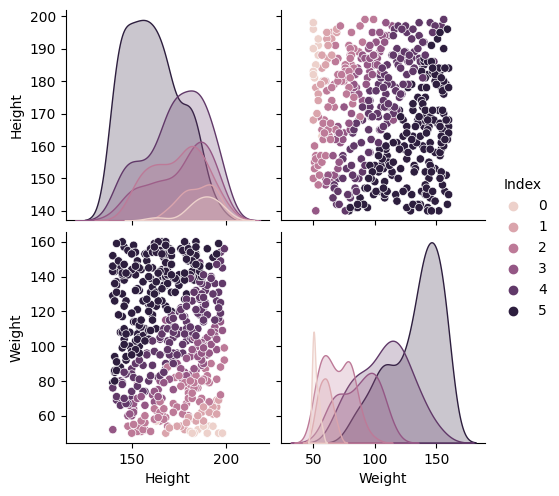

In [17]:
sns.pairplot(df, diag_kind='kde', hue='Index')
plt.show()

1.2 Lineer Regresyon Modeli

In [18]:
X = new_df.iloc[:,0:2].values
  
Y = new_df.iloc[:,2].values

In [19]:
X

array([[174,  96],
       [189,  87],
       [185, 110],
       [195, 104],
       [149,  61],
       [189, 104],
       [147,  92],
       [154, 111],
       [174,  90],
       [169, 103],
       [195,  81],
       [159,  80],
       [192, 101],
       [155,  51],
       [191,  79],
       [153, 107],
       [157, 110],
       [140, 129],
       [144, 145],
       [172, 139],
       [157, 110],
       [153, 149],
       [169,  97],
       [185, 139],
       [172,  67],
       [151,  64],
       [190,  95],
       [187,  62],
       [163, 159],
       [179, 152],
       [153, 121],
       [178,  52],
       [195,  65],
       [160, 131],
       [157, 153],
       [189, 132],
       [197, 114],
       [144,  80],
       [171, 152],
       [185,  81],
       [175, 120],
       [149, 108],
       [157,  56],
       [161, 118],
       [182, 126],
       [185,  76],
       [188, 122],
       [181, 111],
       [161,  72],
       [140, 152],
       [168, 135],
       [176,  54],
       [163,

In [20]:
Y

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4, 2, 4, 3, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 2, 3, 3, 1, 5, 5, 5, 1, 1, 5, 5, 4, 3, 4, 5, 2, 4, 5, 2, 5,
       4, 2, 4, 4, 3, 5, 5, 1, 5, 4, 4, 3, 4, 5, 3, 5, 0, 5, 0, 2, 5, 5,
       4, 2, 4, 4, 2, 4, 5, 2, 3, 4, 4, 4, 4, 0, 3, 5, 3, 4, 5, 0, 5, 5,
       5, 5, 5, 3, 3, 2, 4, 5, 4, 5, 1, 0, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3,
       4, 5, 4, 2, 4, 3, 2, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 2, 5, 2,
       5, 4, 5, 5, 5, 3, 5, 5, 2, 4, 5, 5, 5, 4, 3, 5, 3, 3, 0, 3, 3, 5,
       5, 4, 3, 5, 3, 4, 2, 2, 3, 5, 4, 2, 4, 5, 3, 2, 4, 5, 5, 4, 4, 4,
       4, 3, 5, 3, 3, 4, 4, 2, 3, 3, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4,
       5, 5, 1, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 0, 5, 3, 4, 5, 5, 4, 2, 3, 3, 4, 3, 5, 5, 2, 5, 3, 2,
       1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5,

In [21]:
from sklearn.model_selection import train_test_split #sadece modeli olusturuken kutuphane kullanilmamasi gerektigini varsaydigim icin o yuzden burada train test spliti kullandim

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split( 
      X, Y, test_size = 1/2, random_state = 0 )

In [23]:
from LR import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

Iteration 1: MSE = 73692.112
Iteration 2: MSE = 70316.12635779506
Iteration 3: MSE = 67094.77228400162
Iteration 4: MSE = 64020.96787672389
Iteration 5: MSE = 61087.95555760949
Iteration 6: MSE = 58289.28721949436
Iteration 7: MSE = 55618.810054200614
Iteration 8: MSE = 53070.6530293383
Iteration 9: MSE = 50639.213984394446
Iteration 10: MSE = 48319.14731774558
Iteration 11: MSE = 46105.35223753653
Iteration 12: MSE = 43992.96155060142
Iteration 13: MSE = 41977.33096478874
Iteration 14: MSE = 40054.02888118019
Iteration 15: MSE = 38218.82665376782
Iteration 16: MSE = 36467.689295183765
Iteration 17: MSE = 34796.766608055594
Iteration 18: MSE = 33202.38472249621
Iteration 19: MSE = 31681.038021129705
Iteration 20: MSE = 30229.38143390656
Iteration 21: MSE = 28844.22308577381
Iteration 22: MSE = 27522.517281041622
Iteration 23: MSE = 26261.357809027504
Iteration 24: MSE = 25057.971556265584
Iteration 25: MSE = 23909.712411242363
Iteration 26: MSE = 22814.055448262257
Iteration 27: MSE = 

1.3 Sonuclar

In [25]:
Y_pred = model.predict( X_test )

In [26]:
print("Predicted y:", Y_pred)

Predicted y: [4.380215993340333, 4.353812828741582, 3.601322637677147, 3.9445637774609237, 3.7465400429702833, 3.429702067785258, 3.7861447898684117, 4.340611246442205, 3.7729432075690355, 4.0633780181553085, 2.9940498519058485, 2.941243522708344, 2.9676466873070964, 3.2844846624921216, 4.116184347352813, 3.7861447898684113, 3.6409273845752748, 3.4825083969827624, 3.508911561581514, 2.9544451050077205, 3.1260656748996087, 3.680532131473403, 3.469306814683386, 3.7861447898684113, 3.442903650084634, 3.337290991689626, 3.9841685243590526, 4.129385929652189, 2.7828245351158314, 3.4032989031865064, 3.0336545988039765, 3.3240894093902495, 4.050176435855932, 3.3504925739890017, 3.5485163084796425, 3.2712830801927453, 4.4330223225378385, 3.45610523238401, 4.446223904837214, 3.152468839498361, 3.39009732088713, 4.08978118275406, 3.680532131473403, 4.234998588047197, 3.5485163084796425, 3.6409273845752748, 4.683852386225983, 2.664010294421447, 3.852152701365292, 4.168990676550316, 4.512231816334

In [27]:
import matplotlib.pyplot as plt

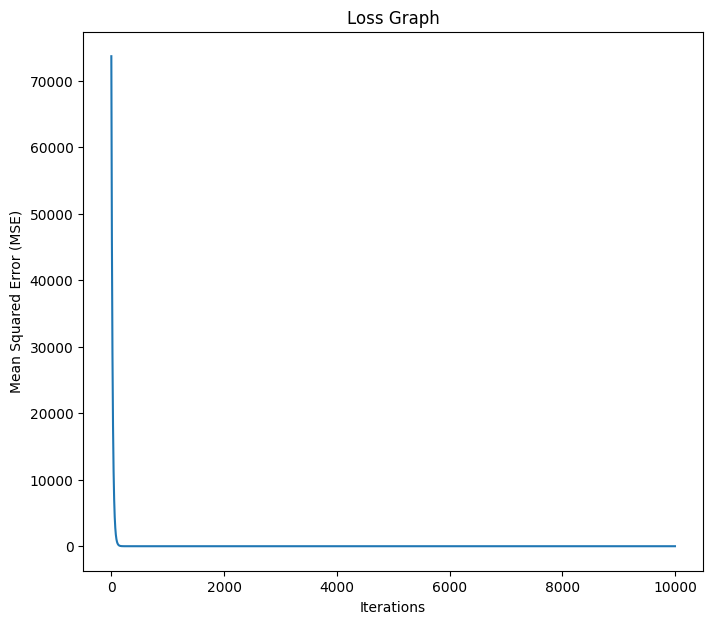

In [28]:
# Plot the loss graph
plt.plot(range(len(model.loss)), model.loss)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Graph")
plt.show()

In [29]:
predicted_index_test = [int(round(model.predict([xi])[0])) for xi in X_test]

# Calculate train and test accuracies
# train_accuracy = sum(predicted_index_train == Y_train) / len(Y_train)
test_accuracy = sum(predicted_index_test == Y_test) / len(Y_test)#Accuracy 
# print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.252


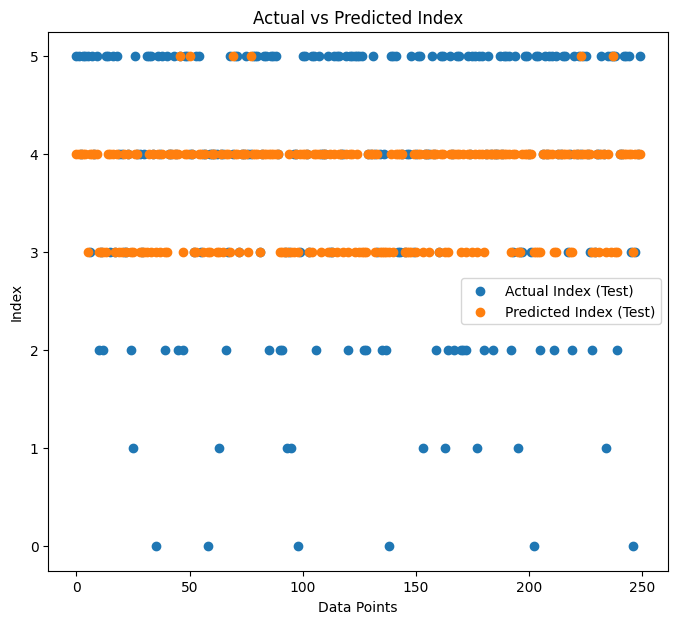

In [30]:
# # Plot the accuracy graph
# plt.plot(range(len(predicted_index_train)), Y_train, label="Actual Index (Train)")
# plt.plot(range(len(predicted_index_train)), predicted_index_train, label="Predicted Index (Train)")
plt.scatter(range(len(predicted_index_test)), Y_test, label="Actual Index (Test)")
plt.scatter(range(len(predicted_index_test)), predicted_index_test, label="Predicted Index (Test)")
plt.xlabel("Data Points")
plt.ylabel("Index")
plt.title("Actual vs Predicted Index")
plt.legend()
plt.show()

Sonuclar hakkinda:

Modeli egitirken farkli parametreleri kullandim fakat accuracy kismindaki orani artiramadiö.
Loss Graphte bu parametreler icin farkli grafikler gordum.
Fakat alabildigim en guzel sonuc bu oldu.
Accuracyi artirmak icin LR.py dosyasinda farkli varyasyonlar denedim fakat en fazla bu sonucu aldim.
Ama Loss Graphe baktigimda her iterasyonda hatanin azaldigini gordum ve bu diger parametrelere gore MSEnin 1000. iterasyonda alinan en iyi sonucun bu parametrelerde oldugunu gozlemledim. 